# CMSE 202 Final Project
## Factors of Generational Wealth
## Questions we are trying to answer
1. How race & education impact generational wealth over time?
2. How has the income gap changed over time?
3. Find the most important factors that impact generational wealth.
4. How does a hand made model compare to a pre made machine learning model?

In [1]:
## Import useful libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Reading in the data
education = pd.read_csv("dfa-education-levels.csv")
race = pd.read_csv("dfa-race-levels.csv")
networth = pd.read_csv("dfa-networth-levels.csv")
generation = pd.read_csv("dfa-generation-levels.csv")
income = pd.read_csv("dfa-income-levels.csv")


In [3]:
## cleaning all of the data
data = [education,race,networth,generation,income]
for i in range(len(data)):
    data[i] = data[i].drop(columns = data[i].columns[3:14])
    data[i][['Year','Quarter']] = pd.DataFrame(data[i].Date.str.split(':',1).tolist(), columns = ['year','quarter'])
    data[i] = data[i].drop(columns = ['Date'])
education = data[0]
race = data[1]
networth = data[2]
generation = data[3]
income = data[4]


In [30]:
## Modeling 
import numpy as np
education.groupby('Year')
year_init = list(np.arange(1990, 2020))*4
year_init.extend([1989, 1989, 2020, 2020])
years = np.sort(year_init)

s = education.groupby('Category')['Net worth'].apply(list)
edu_split = s.apply(pd.Series).T
edu_split['Year'] = years
edu_avg = edu_split.groupby('Year').apply(np.mean)
edu_avg_new = edu_avg.drop(columns='Year')
edu_avg_new


Category,College,HS,NoHS,SomeCollege
Year,,,,
1989,10251471.00,4179868.00,2232406.50,3959726.00
1990,10652312.75,4220006.75,2177171.25,4105467.75
1991,11628279.25,4316600.75,1966321.50,4420049.50
1992,12378684.50,4461190.00,1835193.50,4746425.00
1993,13154214.50,4760919.75,1893918.00,5057583.00
1994,13390758.25,5168541.75,2078021.50,5265180.25
1995,13992245.50,5750676.50,2163850.00,5716067.50
1996,15583027.25,6034323.00,2025201.50,6081689.75
1997,17521205.25,6363627.00,1876543.00,6535815.50


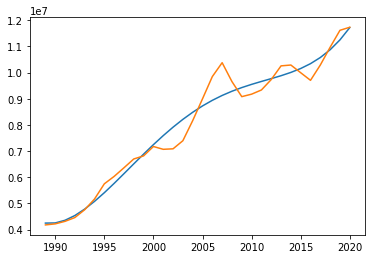

In [58]:
def easy_fit(x,y,deg=4):
    fit = np.polyfit(x,y,deg=4)
    func = np.poly1d(fit)
    new_x = func(x)
    return new_x
new_x = easy_fit(edu_avg['Year'],edu_avg['HS'])

plt.figure(1)
plt.plot(edu_avg['Year'],new_x)
plt.plot(edu_avg['Year'],edu_avg['HS'])

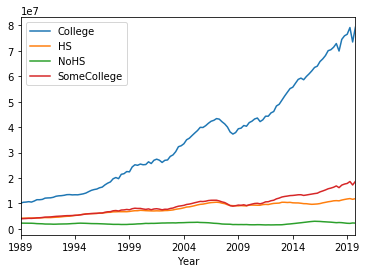

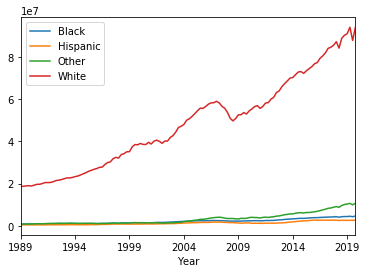

In [57]:
# plt.plot(education['Year'], education['Net worth'], color=education['Category'])
fig, ax = plt.subplots();
plt.figure(1)
education.groupby('Category').plot(x='Year', y='Net worth', ax=ax);
plt.legend([v[0] for v in education.groupby('Category')['Category']])
fig, ax = plt.subplots();
plt.figure(2)
race.groupby('Category').plot(x='Year', y='Net worth', ax=ax);
plt.legend([v[0] for v in race.groupby('Category')['Category']])

In [6]:
## predicting wealth function based on educataion, race, generation
def predict_wealth(education_level,race_,generation_):  # Adam 
    avg_education = None 
    avg_race = None
    avg_generation = None
    if education_level == 'College':
        avg_education = education['Net worth'].iloc[-4]
    elif education_level == 'SomeCollege':
        avg_education = education['Net worth'].iloc[-3]
    elif education_level == 'HS':
        avg_education = education['Net worth'].iloc[-2]
    elif education_level == 'NoHS':
        avg_education = education['Net worth'].iloc[-1]
    else:
        print('Education not identified. Please Try Again')
        
    
    if race_ == 'White':
        avg_race = race['Net worth'].iloc[-4]
    elif race_ == 'Black':
        avg_race = race['Net worth'].iloc[-3]
    elif race_ == 'Hispanic':
        avg_race = race['Net worth'].iloc[-2]
    elif race_ == 'Other':
        avg_race = race['Net worth'].iloc[-1]
    else:
        print('Race not identified. Please Try Again')
        
    if generation_ == 'Silent':
        avg_generation = generation['Net worth'].iloc[-4]
    elif generation_ == 'BabyBoom':
        avg_generation = generation['Net worth'].iloc[-3]
    elif generation_ == 'GenX':
        avg_generation = generation['Net worth'].iloc[-2]
    elif generation_ == 'Millennial':
        avg_generation = generation['Net worth'].iloc[-1]
    else:
        print('Generation not identified. Please Try Again')
    
            
    if avg_race == None or avg_education == None or avg_generation == None: 
        avg_wealth = None    
        print('Incorrect Input')
    else:
        avg_wealth = round((avg_education + avg_race + avg_generation)/3,2)
    

    
    return print('$',avg_wealth)
    

In [7]:
print('Type of educations')
print(education['Category'].tail(4))

print('Type of races')
print(race['Category'].tail(4))

print('Type of generations')
print(generation['Category'].tail(4))


Type of educations
492        College
493    SomeCollege
494             HS
495           NoHS
Name: Category, dtype: object
Type of races
492       White
493       Black
494    Hispanic
495       Other
Name: Category, dtype: object
Type of generations
492        Silent
493      BabyBoom
494          GenX
495    Millennial
Name: Category, dtype: object


In [8]:
predict_wealth('College','Other','GenX')


$ 39502487.0


In [54]:
## machine learning model

In [55]:
#stacking the data frames
new = race.append([education,networth,generation])
new = new.sort_values(by = ['Year','Quarter'])
new = new.reset_index(drop = True)


In [56]:
#plt.plot(education['Net worth'],education['Year'],c = education['Category'])

In [57]:
#Changing 
new = new.replace({'White': 0, 'Black': 1,'Hispanic': 2,'Other': 3,
                  'College': 4, 'SomeCollege': 5,'HS': 6,'NoHS': 7,
                  'Top1': 8, 'Next9': 9,'Next40': 10,'Bottom50': 11,
                  'Silent': 12, 'BabyBoom': 13,'GenX': 14,'Millennial': 15,
                  })
new.head(20)


,Category,Net worth,Year,Quarter
0,0,18507570,1989,Q3
1,1,779379,1989,Q3
2,2,419183,1989,Q3
3,3,725023,1989,Q3
4,4,10069957,1989,Q3
5,5,3927113,1989,Q3
6,6,4182626,1989,Q3
7,7,2251459,1989,Q3
8,8,4810519,1989,Q3
9,9,7609401,1989,Q3


In [93]:
new.iloc[602]

Category           10
Net worth    12671436
Year             1998
Name: 602, dtype: object

# Conclusion

In [63]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

In [64]:
new = new.drop(columns = ['Quarter'])


In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new.iloc[:,0:2], new.iloc[:,2], test_size=0.33, random_state=42)

In [101]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
#X, y = make_classification(n_samples=100, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(new.iloc[:,0:2], new.iloc[:,2], stratify=new.iloc[:,2])
clf = MLPClassifier(random_state=1, max_iter=10000).fit(X_train, y_train)
clf.predict_proba(X_test[:1])
clf.predict(X_test.iloc[1:,:])
clf.score(X_test, y_test)


0.03225806451612903

In [90]:

X_test.iloc[1:,:]
X_test[:1]

,Category,Net worth
602,10,12671436


In [92]:
#clf.predict_proba(X_test[:1])
clf.predict(X_test.iloc[1:,:])

array(['2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018',
       '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018',
       '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018',
       '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018',
       '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018',
       '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018',
       '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018',
       '1998', '2018', '2018', '2018', '2018', '2018', '2018', '2018',
       '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018',
       '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018',
       '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018',
       '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018',
       '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018',
       '2018', '2018', '2018', '2018', '2018', '2018', '2018', '2018',
      

In [100]:
corrmat = X_train.corr()

,Category,Net worth
Category,1.000000,-0.139655
Net worth,-0.139655,1.000000


In [106]:
def prep_inputs(X_train,Y_train):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    x_train_enc = oe.transform(X_train)
    x_test_enc = oe.transfor(X_test)
    return x_train_enc, x_test_enc

In [107]:
prep_inputs(X_train,y_train)

NameError: name 'OrdinalEncoder' is not defined

Neural Network Model 

Inputs:                     Hideen Layers:                output:
    Categories              1                             Predicted Net Worth
    Net Worth               2
    Year                    3